In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('/Users/ae/Downloads/DSL-StrongPasswordData.csv')

In [16]:
df.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [9]:
feature_cols = [column for column in df.columns if column.startswith(('H.', 'DD.', 'UD.'))]

In [10]:
X = df[feature_cols]

In [11]:
X.head()

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [20]:
Y = df['subject']
user_id = 's002'
user_data  = df[Y == user_id]
other_data = df[Y != user_id]

In [21]:
X_user = user_data[feature_cols]
X_other = other_data[feature_cols]

In [22]:
X_train, X_test = train_test_split(X_user, test_size=0.3, random_state=18)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_other_scaled = scaler.transform(X_other)

In [26]:
z_score = np.abs(X_other_scaled)
z_score_mean = z_score.mean(axis=1)
anomalies = z_score_mean > 3
result = np.sum(anomalies)

In [27]:
result

np.int64(699)

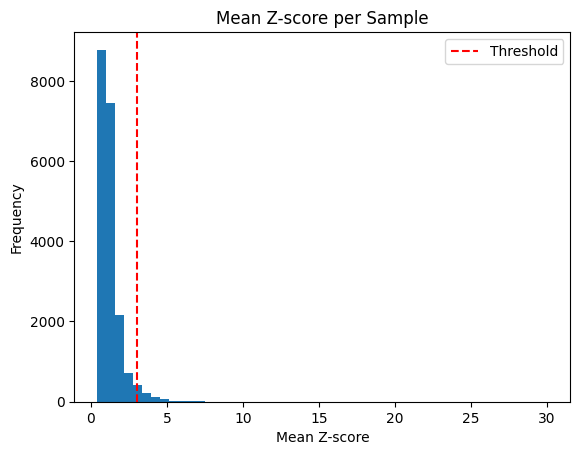

In [28]:
plt.hist(z_score_mean, bins=50)
plt.axvline(3, color='r', linestyle='dashed', label='Threshold')
plt.title('Mean Z-score per Sample')
plt.xlabel('Mean Z-score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [29]:
from scipy.spatial import distance

In [35]:
mean = np.mean(X_train_scaled, axis=0)
cov = np.cov(X_train_scaled, rowvar=False)
cov += np.eye(cov.shape[0]) * 1e-6
inv_cov = np.linalg.inv(cov)

In [36]:
mahalanobis_distance = np.array([distance.mahalanobis(row, mean, inv_cov) for row in X_other_scaled])

In [37]:
mahalanobis_anomalies = mahalanobis_distance > 6

In [38]:
np.sum(mahalanobis_anomalies)

np.int64(14271)

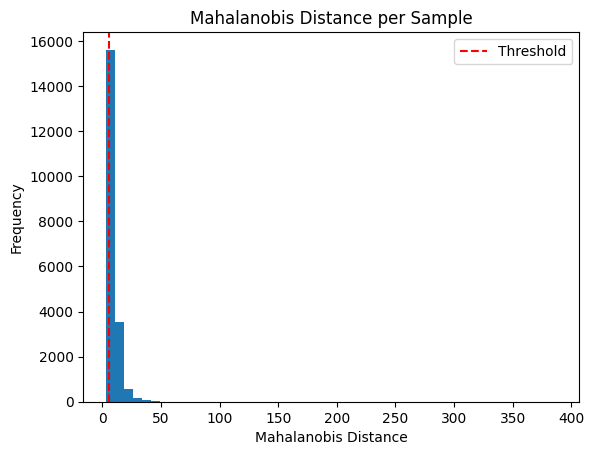

In [39]:
plt.hist(mahalanobis_distance, bins=50)
plt.axvline(6, color='red', linestyle='--', label='Threshold')
plt.title("Mahalanobis Distance per Sample")
plt.xlabel("Mahalanobis Distance")
plt.ylabel("Frequency")
plt.legend()
plt.show()